<div style="text-align: center;">
    <h1><strong>Physics 129L: Problem Set 4</strong></h1>
</div>

<div style="text-align: center;">
    <h3><strong>Problem Set Submission Guideline</strong></h3>
</div>

**A) Github Submissions**
We will use GitHub for problem set submissions. To access the problem set, please **fork** and **clone** the **forked** repository to your local virtual machine. **Please complete the problem set in this forked directory.** Submit **a pull request** for merging into the main branch before the problem set due date.

**B) .tar.gz File compression and submission on Github**
For each problem set, you are asked to submit the compressed version of the problem set to GitHub via git operation. Here is a step-by-step guideline:

1. Use the **tar** command to compress the problem set directory into a **single** ".tar.gz" file.
2. Obtain the sha256sum by running "sha256sum P2.tar.gz".
3. Echo the **full sha256sum** to a text file named "sha25sum_problem_set.txt".
4. Initialize a git repository named "Archive_P# (#: problem set number) on your local machine, and move both the "tar.gz" file and the "sha25sum_problem_set.txt" file to the repository.
5. Create an empty **public** directory under the **same name** in **your own GitHub account**.
6. **Push** this local repository to the remote repository.

<div style="text-align: center;">
    <h2><strong>Problem 1: Statistical Inference on Biased Coins</strong></h2>
</div>


Let's consider a problem similar to the one we discussed in class. You are given three datasets, each containing 500 coin-flip outcomes represented as **Boolean** values (True means Head, and False means Tail). In this problem, your task is to investigate potential biases in the coin flips within these datasets. To load the dataset, please use the following code: 

In [2]:
import json 
# Define the file path for the JSON file
json_file_path = 'problem_1/dataset_1.json'

# Read the boolean data from the JSON file into a Python list
with open(json_file_path, 'r') as json_file:
    boolean_list_out = json.load(json_file)

<div style="text-align: center;">
    <h3><strong> Bayesian Inference </strong></h3>
</div>
<br>
As discussed in class, for a given $p$, the probability that $N=500$ tosses result in $M$ heads and $N-M$ tails is given by the binomial distribution, with the probability mass function, namely the likelyhood function:
<br>
$$ P(M,N|p) = \binom{N}{M} p^{M} (1-p)^{N-M}. $$
<br>
Then the corresponding posterior is given by the Bayes' theorem,
$$ P(p|M,N) \sim \frac{1}{B(M,N)} P(M,N|p)P(p), $$
where,
<br>
$$ B(M,N) = \int_0^1 dp\ p^{M} (1-p)^{N-M} = \frac{\Gamma(M+1)\Gamma(N-M+1)}{\Gamma(N+2)} .$$
<br>
Note that the above integral defines the Beta function, expressed in terms of the Gamma function (factorial, $\Gamma(n+1) = n!$). For more details, please check out https://en.wikipedia.org/wiki/Beta_function). <br>
<br>


## A) 
First, we assume that our initial model for $p$ is a uniform distribution (prior), i.e., $P(p) \sim 1/N$.
<br>

With this prior distribution, apply the Bayesian inference methods discussed in class to calculate the likelihood functions for three datasets named 'problem_1/dataset_1.json,' 'problem_1/dataset_2.json,' and 'problem_1/dataset_3.json.' Subsequently, create a (3,1) plot to visualize the corresponding posterior distributions for each dataset. Additionally, numerically calculate the expectation value and variance of each posterior distribution. (hint: look at the stats.ipynb I provided on Canvas)



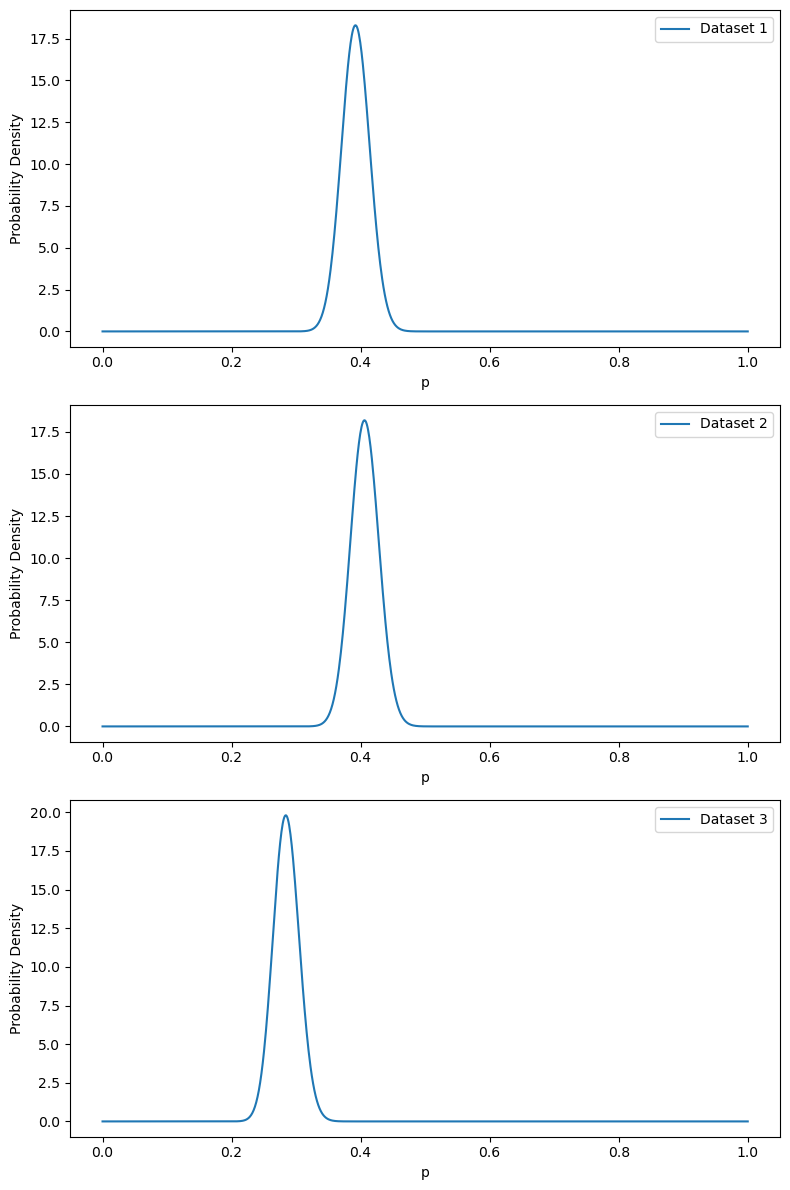

Expectation Values: [0.39243027888446214, 0.4063745019920319, 0.2848605577689243]
Variances: [0.00047401342962052765, 0.0004795909863275546, 0.00040500004054970506]


'--------------------Write your code above this line------------------------------'

In [5]:
import numpy as np
import matplotlib.pyplot as plt

'''--------------------Write your code below this line------------------------------'''
from scipy.stats import beta


alpha_prior = 1
beta_prior = 1

def compute_posterior(M, N, alpha_prior, beta_prior):
    alpha_post = M + alpha_prior
    beta_post = N - M + beta_prior
    return alpha_post, beta_post

p_values = np.linspace(0, 1, 1000)

fig, axes = plt.subplots(3, 1, figsize=(8, 12))

expectations = []
variances = []

datasets = ['problem_1/dataset_1.json', 'problem_1/dataset_2.json', 'problem_1/dataset_3.json']

for idx, dataset in enumerate(datasets):
    with open(dataset, 'r') as f:
        data = json.load(f)
    
    M = sum(data)
    N = len(data)
    
    alpha_post, beta_post = compute_posterior(M, N, alpha_prior, beta_prior)
    
    posterior = beta(alpha_post, beta_post).pdf(p_values)
    
    axes[idx].plot(p_values, posterior, label=f'Dataset {idx + 1}')
    axes[idx].set_xlabel('p')
    axes[idx].set_ylabel('Probability Density')
    axes[idx].legend()
    
    exp = beta(alpha_post, beta_post).mean()
    var = beta(alpha_post, beta_post).var()
    
    expectations.append(exp)
    variances.append(var)

plt.tight_layout()
plt.show()

# Print the calculated expectation values and variances
print("Expectation Values:", expectations)
print("Variances:", variances)





'''--------------------Write your code above this line------------------------------'''



<div style="text-align: center;">
    <h3><strong> Frequentist Inference: Stirling‚Äôs approximation </strong></h3>
</div>
<br>
As we discussed in class, the frequentist inference assumes a fixed $p_{\rm true}$. Maximum Likelihood Estimation (MLE) is a technique used to estimate the parameter $p_{\rm true}$ of a presumed probability distribution (in this case, binomial) based on observed data. It involves maximizing a likelihood function,
<br>
$$ P(M,N|p) = \binom{N}{M} p^{M} (1-p)^{N-M}. $$
<br>
with the objective of making the observed data most likely under the assumed model. In practice, working with the natural logarithm of the likelihood function $P(M,N|p)$, known as the log-likelihood, is often more convenient,
$$\mathcal{P}(M,N|p)=\log [P(M,N|p)]=  \log[\binom{N}{M}]+ M \log(p)+({N-M}) \log(1-p).$$
When $N$ is large, we can approximate the factorial by the Stirling‚Äôs approximation,
<br>
$$\log(n!) \approx n\log(n) - n + \frac{1}{2}\log(2\pi n).$$
<br>


## B) 
Numerically check the Stirling‚Äôs approximation by compute both sides of the above equation and make a (2,1) plot that shows the following: 1) for factorial, vary N from 1 to 10 and calculate each value then make a scatter plot. Plot a **smooth curve** that shows the Stirling‚Äôs formula (remember, the Stirling‚Äôs formula takes real values) and the Gamma function $\Gamma(N+1)$. 2) plot the difference between the Stirling‚Äôs formula and the Gamma function. Please label your plot. 

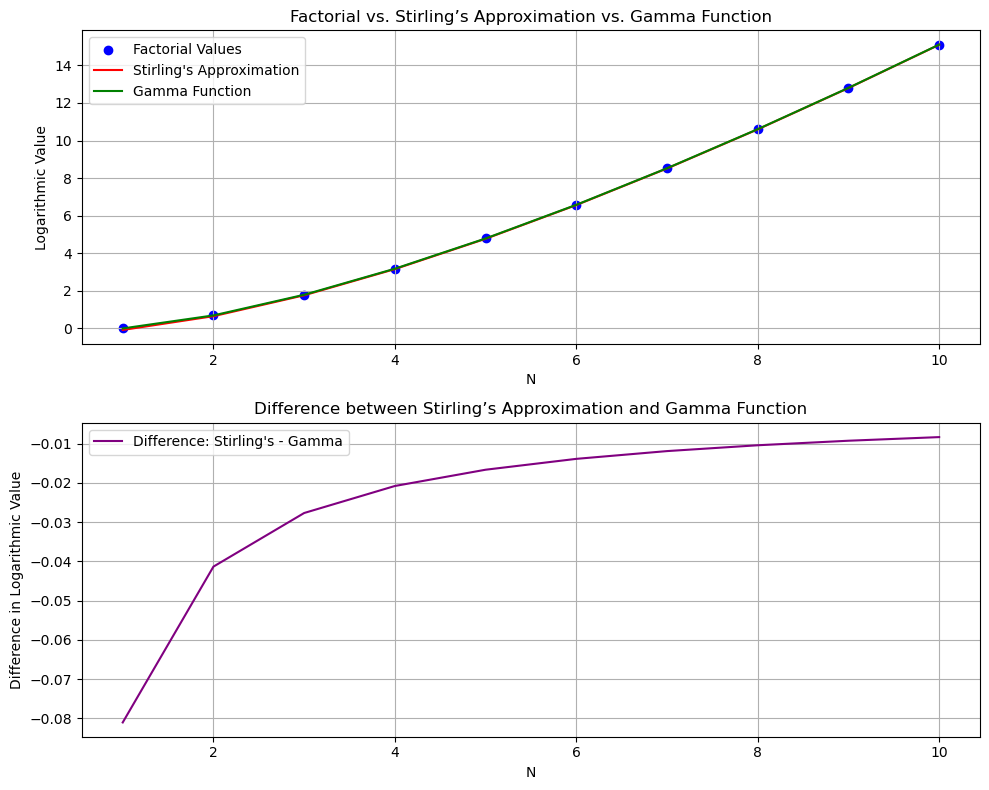

'--------------------Write your code above this line------------------------------'

In [15]:

'''--------------------Write your code below this line------------------------------'''

import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.special import gamma

N = np.arange(1, 11)

factorial_values = np.array([math.log(math.factorial(n)) for n in N])

stirlings_values = np.array([n * log(n) - n + 0.5 * log(2 * pi * n) for n in N])

gamma_values = np.array([log(gamma(n + 1)) for n in N])

fig, ax = plt.subplots(2, 1, figsize=(10, 8))

ax[0].scatter(N, factorial_values, label='Factorial Values', color='blue')
ax[0].plot(N, stirlings_values, label="Stirling's Approximation", color='red')
ax[0].plot(N, gamma_values, label='Gamma Function', color='green')

ax[0].legend()
ax[0].set_title('Factorial vs. Stirling‚Äôs Approximation vs. Gamma Function')
ax[0].set_xlabel('N')
ax[0].set_ylabel('Logarithmic Value')
ax[0].grid(True)

difference = stirlings_values - gamma_values
ax[1].plot(N, difference, label="Difference: Stirling's - Gamma", color='purple')

ax[1].legend()
ax[1].set_title('Difference between Stirling‚Äôs Approximation and Gamma Function')
ax[1].set_xlabel('N')
ax[1].set_ylabel('Difference in Logarithmic Value')
ax[1].grid(True)

plt.tight_layout()
plt.show()


'''--------------------Write your code above this line------------------------------'''


<div style="text-align: center;">
    <h3><strong> Frequentist Inference: Maximum Likelihood Estimation </strong></h3>
</div>
<br>
Maximum Likelihood Estimation is given by the condition,
$$\frac{ \partial  }{ \partial  p} \mathcal{P}(M,N|p)=0.$$


## C)
Calculate the above condition **analytically**,
<br> 
''**write you answer below**''
<br><br> **Steps:** <br>
<br>
1. Differentiate the logged likelihood with p:
$$
\frac{\partial}{\partial p} \ell(M,N|p) = \frac{\partial}{\partial p} \left[ M\log(p) + (N-M)\log(1-p) \right]
$$

2. :
$$
\frac{\partial}{\partial p} M\log(p) = \frac{M}{p}
$$
&
$$
\frac{\partial}{\partial p} (N-M)\log(1-p) = \frac{-(N-M)}{1-p}
$$

3. Sums up:
$$
\frac{M}{p} - \frac{N-M}{1-p} = 0
$$

4. Solving for \( p \):
$$
M(1-p) = p(N-M)
$$
=>
$$
M = pN
$$

the Maximum Likelihood Estimation (MLE) for p is:
$$
p_{\text{max}} = \frac{M}{N}
$$
'' **write you answer above**''
<br> <br> 
What is the $p_{\rm max}$ for the above three datasets? 
''**write you answer below**''
<br>**Data set 1:** $$\frac{196}{500}$$<br> **Data set 2:** $$\frac{203}{500}$$<br>**Data set 3:** $$\frac{142}{500}$$
<br>
'' **write you answer above**''

## D) 
Using the method discussed in the class to find the maximum likelyhood function **numerically** for all three datasets. Plot three maximum likelyhood functions in three different subplots, and also plot the $p_{\rm max}$ above. (hint: look at the stats.ipynb). What do you find?

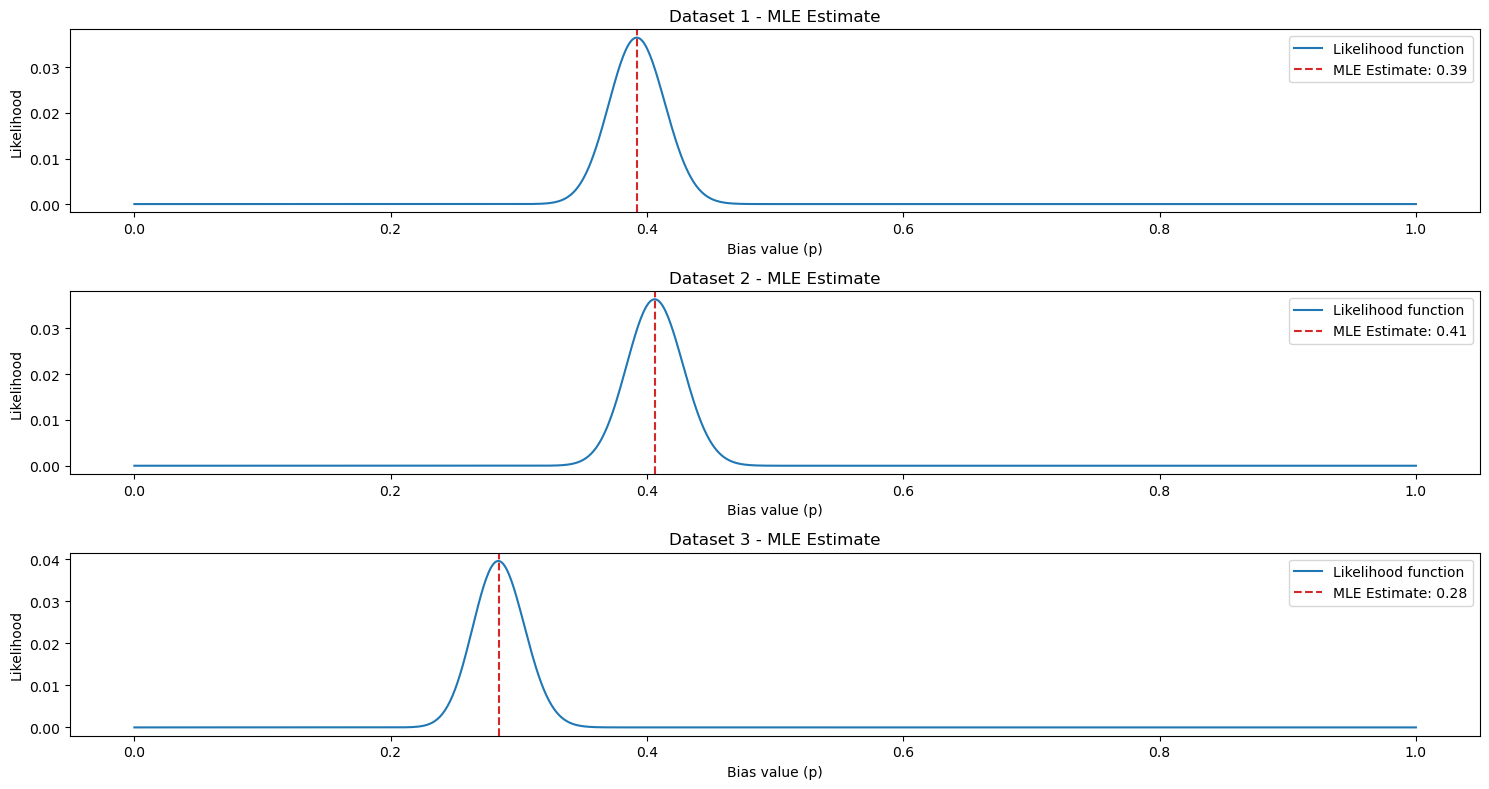

'--------------------Write your code above this line------------------------------'

In [8]:


'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
import json

def plot_mle_for_datasets(datasets):
    ni = len(datasets)
    nj = 1
    fig, axs = plt.subplots(ni, nj, figsize=(15, 8))

    for i, dataset in enumerate(datasets):
        with open(dataset, 'r') as f:
            data = np.array(json.load(f))
        
        N = len(data)  
        M = np.sum(data)  
        
        bias_values = np.linspace(0, 1, 1000)
        
        likelihood = binom.pmf(M, N, bias_values)
        
        mle_estimate = bias_values[np.argmax(likelihood)]

        axs[i].plot(bias_values, likelihood, label='Likelihood function', color='tab:blue')
        axs[i].axvline(x=mle_estimate, color='tab:red', linestyle='--', label=f'MLE Estimate: {mle_estimate:.2f}')
        
        axs[i].set_title(f'Dataset {i+1} - MLE Estimate')
        axs[i].set_xlabel('Bias value (p)')
        axs[i].set_ylabel('Likelihood')
        axs[i].legend()

    plt.tight_layout()
    plt.show()

datasets = ['problem_1/dataset_1.json', 'problem_1/dataset_2.json', 'problem_1/dataset_3.json']
plot_mle_for_datasets(datasets)



'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h3><strong>  Bootstrapping </strong></h3>
</div>
<br>
Bootstrapping belongs to the wider category of resampling methods and involves any test or metric that employs random sampling with replacement, effectively replicating the sampling process (https://en.wikipedia.org/wiki/Bootstrapping_(statistics)),

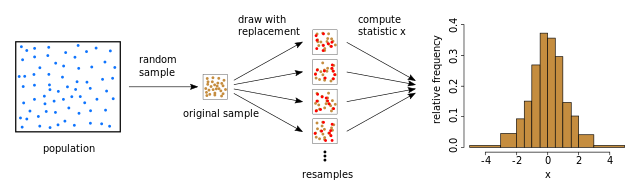
<br>
This process involves a substantial number of iterations, and for each of these bootstrap samples, we compute its expectation value or other statistical properties. The distribution of these expectation values or other statistical properties then provides insights into the characteristics of the underlying distribution. 

## E) 
Bootstrap three datasets 100 times each with sample sizes of 5, 15, 40, 60, 90, 150, 210, 300, and 400, and create a (3,3) histogram (so there will be a total of three (3,3) histograms). Calculate the expectation value and variance for each and label the subplot title with the sample size. 



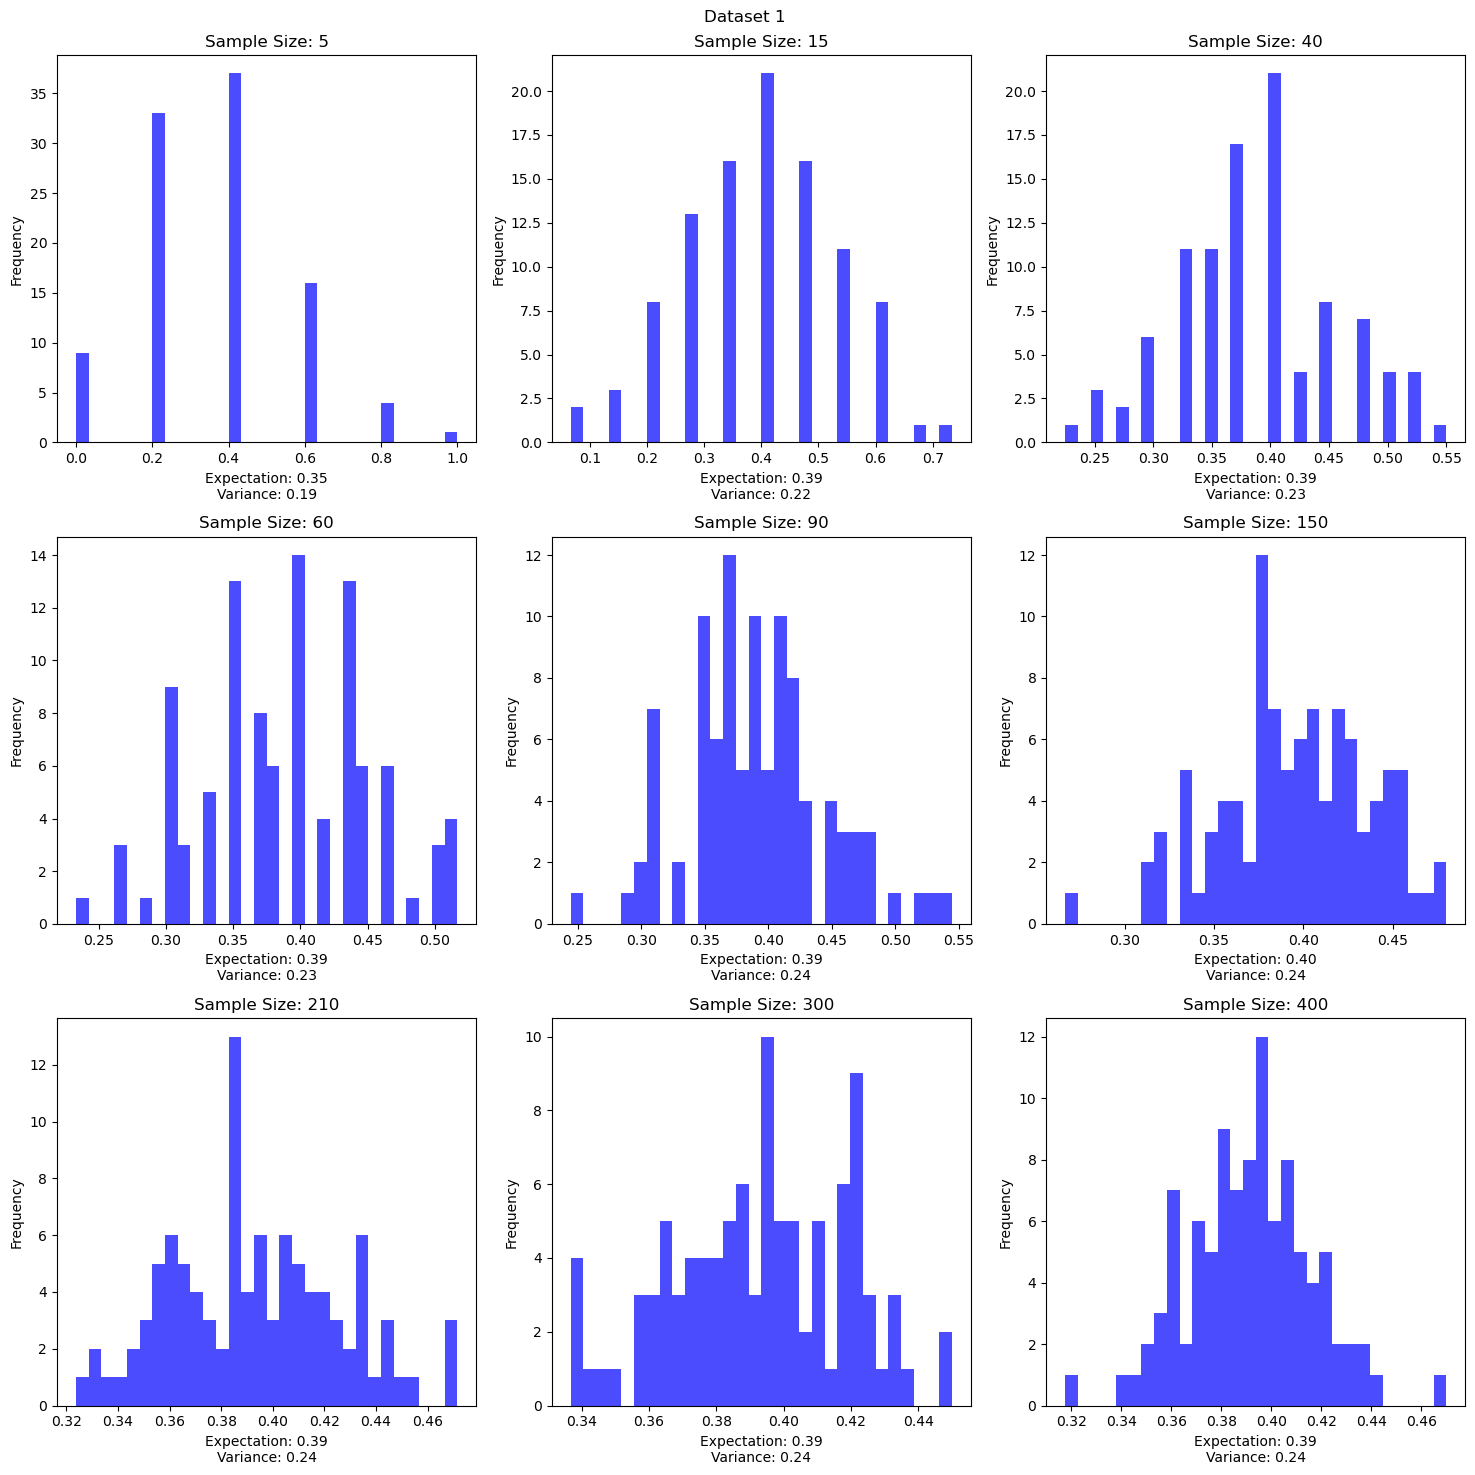

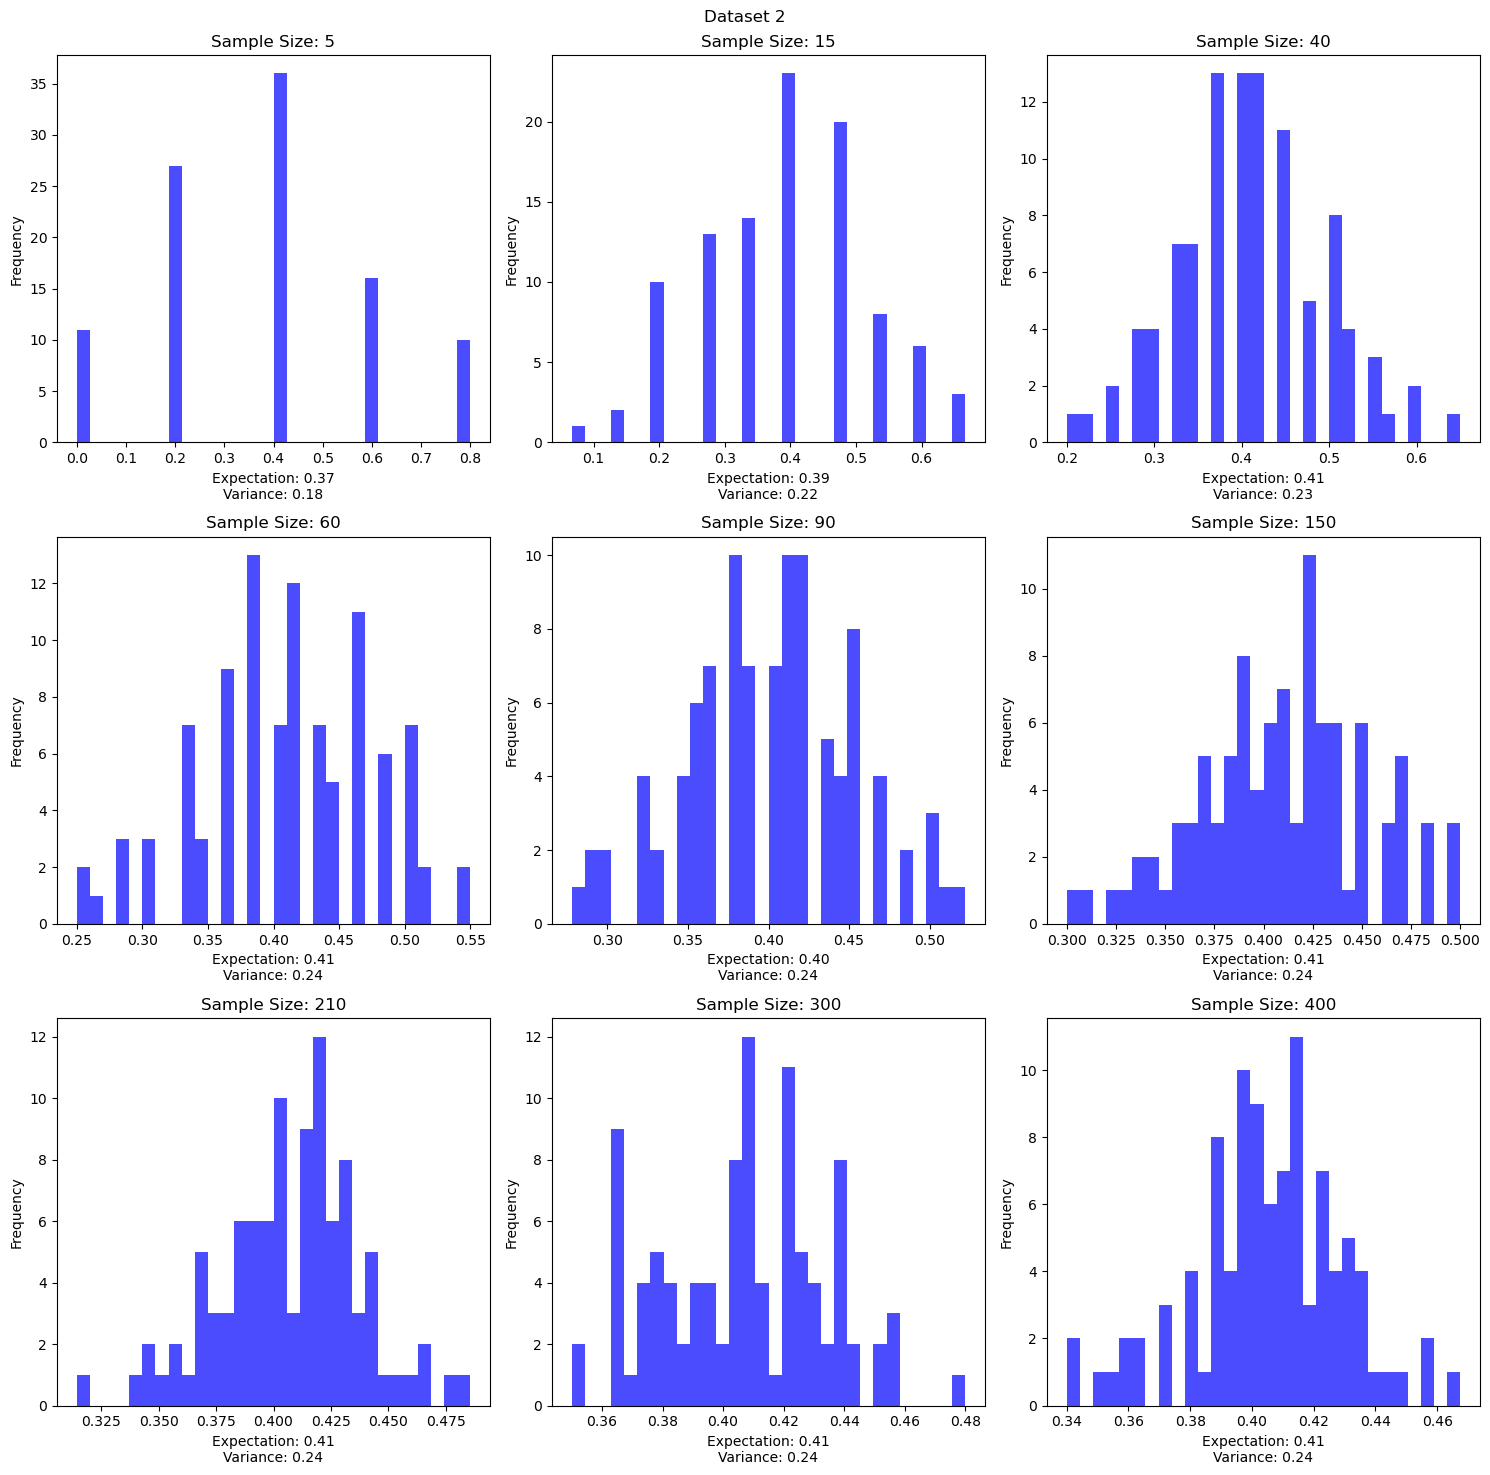

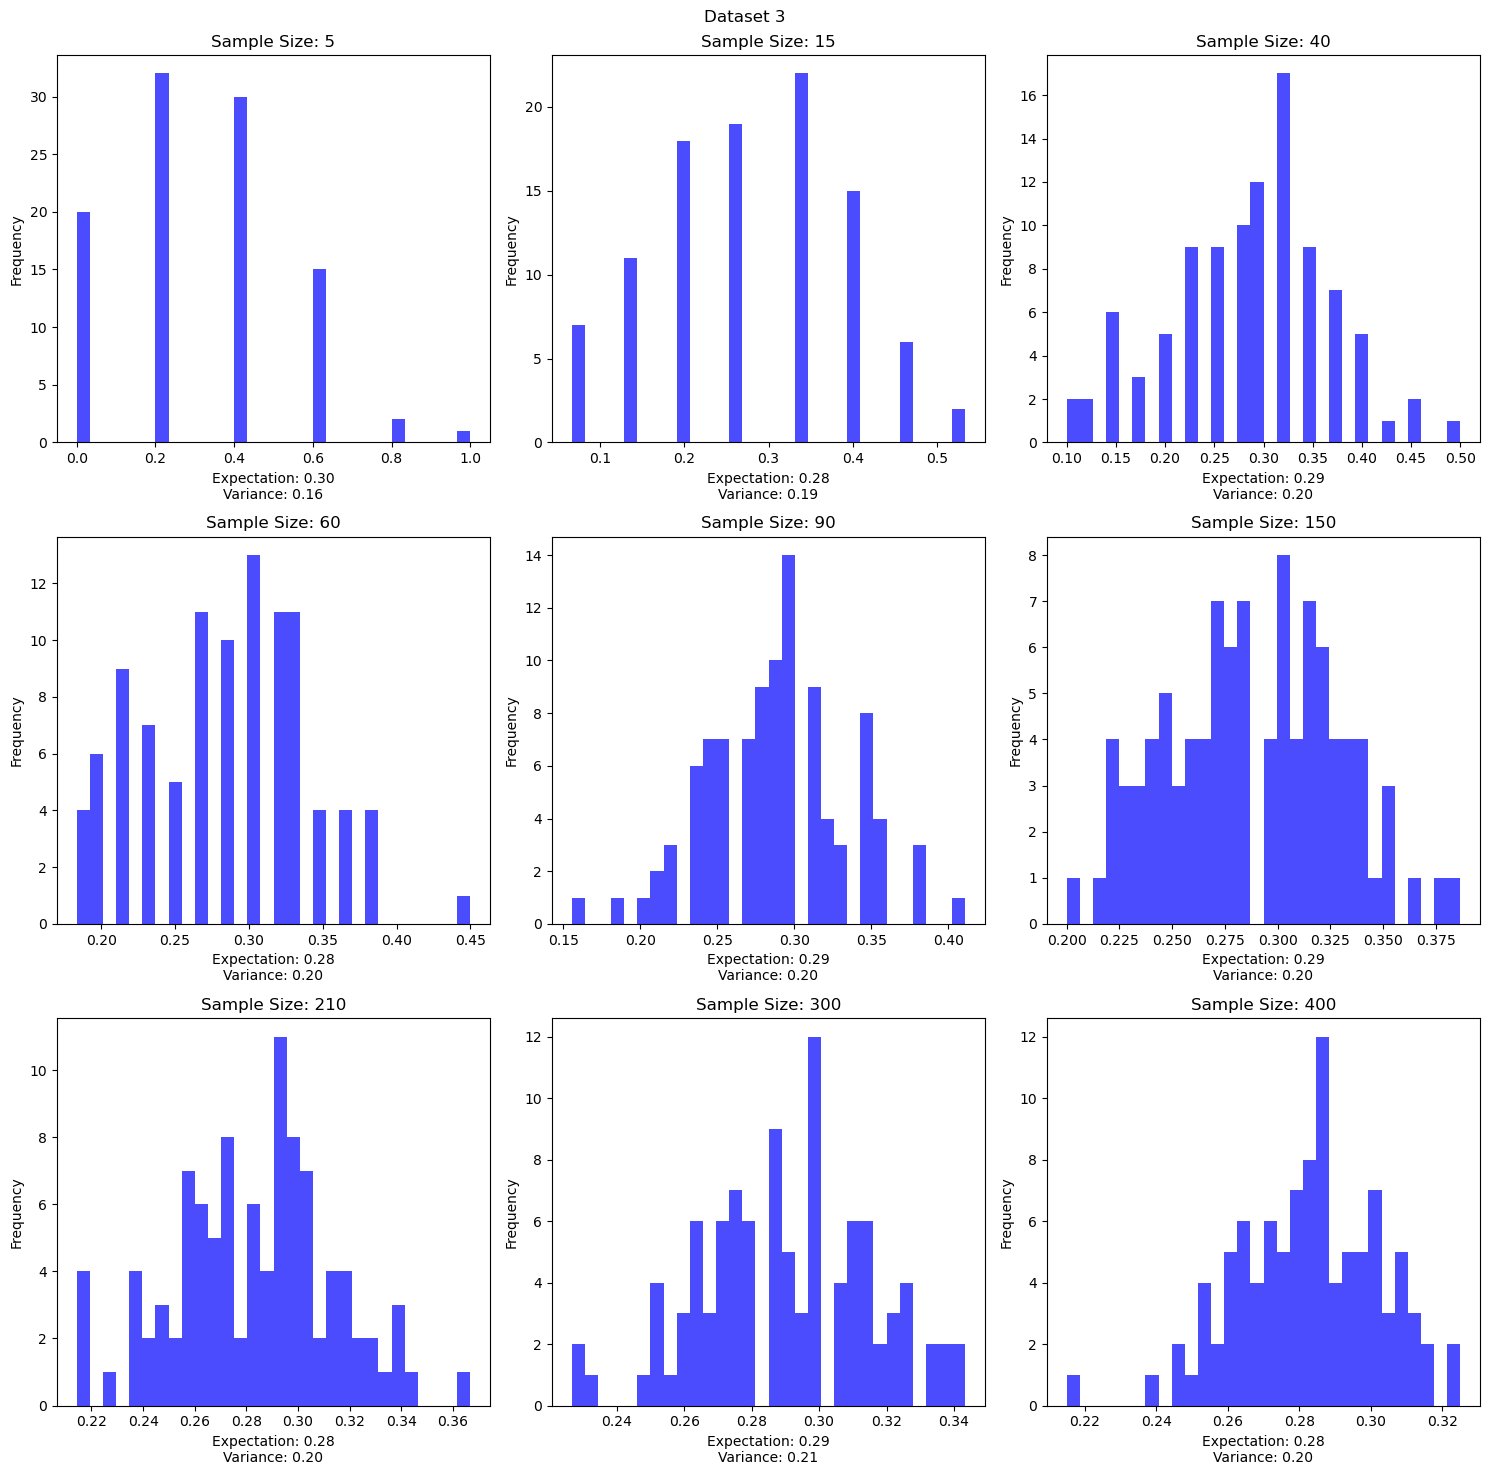

'--------------------Write your code above this line------------------------------'

In [20]:
'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt

import json


with open('problem_1/dataset_1.json', 'r') as file:
    dataset_1 = np.array(json.load(file))
    
with open('problem_1/dataset_2.json', 'r') as file:
    dataset_2 = np.array(json.load(file))
    
with open('problem_1/dataset_3.json', 'r') as file:
    dataset_3 = np.array(json.load(file))

datasets = [dataset_1, dataset_2, dataset_3]

sample_sizes = [5, 15, 40, 60, 90, 150, 210, 300, 400]
bootstrap_iterations = 100

def bootstrap_sample(data, sample_size):
    return np.random.choice(data, size=sample_size, replace=True)

for idx, dataset in enumerate(datasets):
    fig, axs = plt.subplots(3, 3, figsize=(15, 15))
    fig.suptitle(f'Dataset {idx + 1}')

    for i, size in enumerate(sample_sizes):
        expectations = []
        variances = []
        for _ in range(bootstrap_iterations):
            sample = bootstrap_sample(dataset, size)
            expectations.append(np.mean(sample))
            variances.append(np.var(sample))

        row = i // 3
        col = i % 3

        axs[row, col].hist(expectations, bins=30, color='blue', alpha=0.7)
        axs[row, col].set_title(f'Sample Size: {size}')
        axs[row, col].set_xlabel(f'Expectation: {np.mean(expectations):.2f}\nVariance: {np.mean(variances):.2f}')
        axs[row, col].set_ylabel('Frequency')
     
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()

'''--------------------Write your code above this line------------------------------'''

## F) 
Plot the expectation values and variances of the above in comparison with the one you have calculated in **C)**. Are there any difference? and is that what you expected? why? 

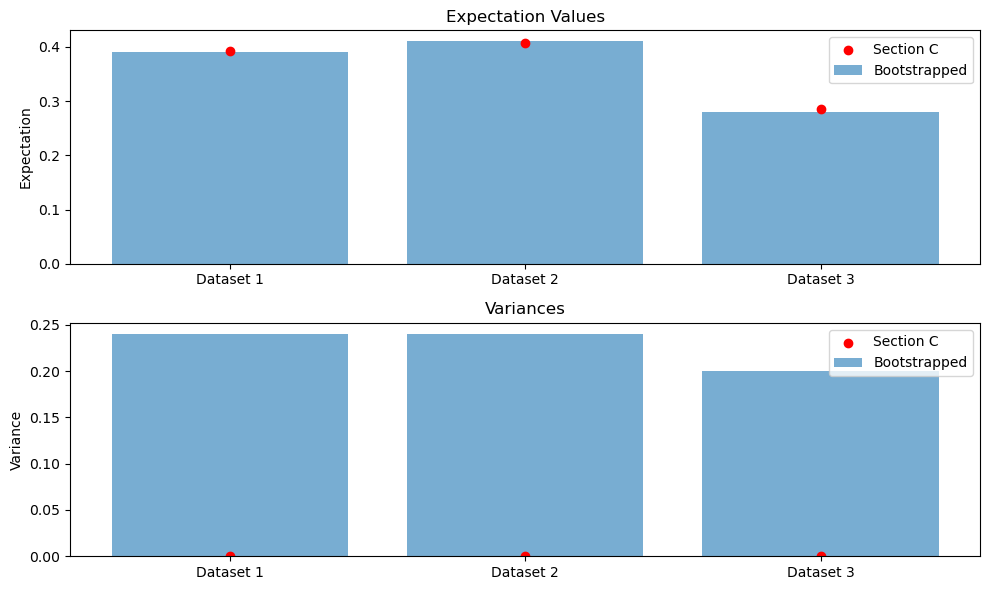

Variance is smaller for bootstrapped data


'--------------------Write your code above this line------------------------------'

In [23]:


'''--------------------Write your code below this line------------------------------'''

expectation_C = [0.392430278884462, 0.40637450199203173, 0.2848605577689244]
variance_C = [0.0004740134296206122, 0.0004795909863276049, 0.0004050000405496912]

bootstrap_expectations = [0.39, 0.41, 0.28]
bootstrap_variances = [0.24, 0.24, 0.20]

datasets = ["Dataset 1", "Dataset 2", "Dataset 3"]

fig, ax = plt.subplots(2, 1, figsize=(10, 6))

ax[0].bar(datasets, bootstrap_expectations, label="Bootstrapped", alpha=0.6)
ax[0].scatter(datasets, expectation_C, color='r', marker='o', label="Section C")
ax[0].set_title('Expectation Values')
ax[0].set_ylabel('Expectation')
ax[0].legend()

ax[1].bar(datasets, bootstrap_variances, label="Bootstrapped", alpha=0.6)
ax[1].scatter(datasets, variance_C, color='r', marker='o', label="Section C")
ax[1].set_title('Variances')
ax[1].set_ylabel('Variance')
ax[1].legend()

plt.tight_layout()
plt.show()

print("Variance is smaller for bootstrapped data")


'''--------------------Write your code above this line------------------------------'''


<div style="text-align: center;">
    <h2><strong> Particle Decay </strong></h2>
</div>

Unstable particles are emitted from a source and undergo decay at a distance $x$, a continuous real number following an exponential probability distribution with a characteristic length $\lambda$. Decay events can be detected only if they happen within a range extending from $x = 1$ to $x = \infty$, (a.u.). A total of $N$ decay events are observed at positions {$x_1$, ... , $x_N$}.
<br>

<div style="text-align: center;">
    <h3><strong> Decay Process: Probability density function  </strong></h3>
</div>
<br>
For a given decay parameter, $\lambda$, the probability of observing a particle at a distance $x$ is given by an exponential function, <br>
‚Äã
\begin{equation}
P(x\ |\ \lambda) = \frac{1}{ Z(\lambda)} \frac{1}{\lambda}e^{-x/\lambda}\ \ \ \ \ \ 0 < x < \infty
\end{equation}
‚Äã
where
$$ Z(\lambda) = \int_0^\infty dx \frac{1}{\lambda}e^{-x/\lambda} = e^{-1/\lambda} . $$

## A)
Define a particle class that takes a single input, named decay constant. Write the probability density function (given a fixed $\lambda$) showing above as a method ('pdf_decay') of the class. 

In [25]:
import numpy as np
import matplotlib.pyplot as plt


'''--------------------Write your code below this line------------------------------'''
class Particle:
    def __init__(self, decay_constant):
        self.decay_constant = decay_constant
    
    def Z(self):
        return np.exp(-1/self.decay_constant)
    
    def pdf_decay(self, x):
        return (1/self.Z()) * (1/self.decay_constant) * np.exp(-x/self.decay_constant)
    
    def plot_pdf(self, x_values, ax, label=None):
        y_values = [self.pdf_decay(x) for x in x_values]
        ax.plot(x_values, y_values, label=label or f"Œª = {self.decay_constant}")

'''--------------------Write your code above this line------------------------------'''

'--------------------Write your code above this line------------------------------'

## B)
Define four particles as class objects with decay constants [0.4,1,2,3]. Plot the pdf curves $P(x\ |\ \lambda) $ and label them (in a single plot). (hint: you may want to define different class methods to output the value). 

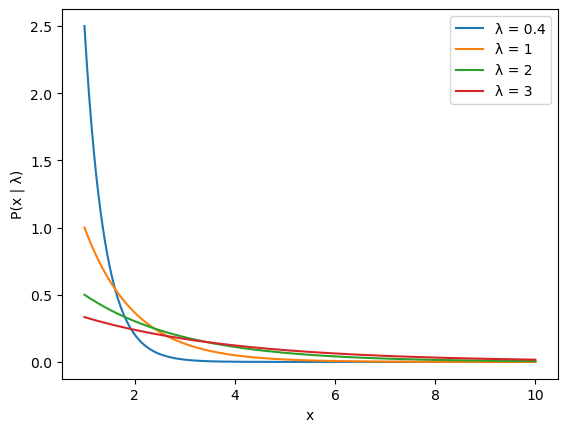

'--------------------Write your code above this line------------------------------'

In [26]:
import numpy as np
import matplotlib.pyplot as plt

'''--------------------Write your code below this line------------------------------'''


particles = [Particle(decay_constant) for decay_constant in [0.4, 1, 2, 3]]

x_values = np.linspace(1, 10, 400)
fig, ax = plt.subplots()
for particle in particles:
    particle.plot_pdf(x_values, ax)

ax.set_xlabel('x')
ax.set_ylabel('P(x | Œª)')
ax.legend()
plt.show()

'''--------------------Write your code above this line------------------------------'''

## C)
Write the probability density function $P(x\ |\ \lambda) $ (given a fixed position $x$) showing above as a **new method** in the particle class. Define four particles as class objects with fixed positions [2,5,7,10]. Plot the pdf curves and label them (in a single plot).

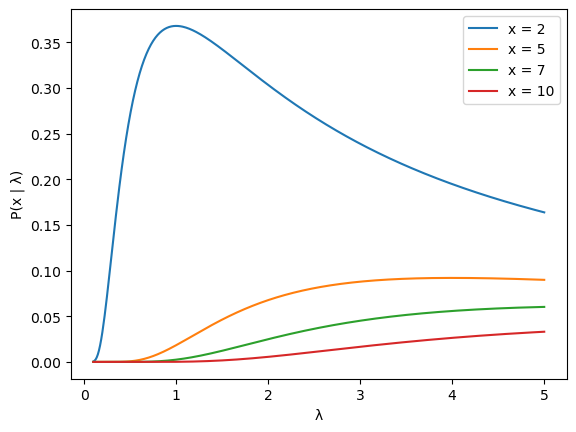

'--------------------Write your code above this line------------------------------'

In [27]:

'''--------------------Write your code below this line------------------------------'''
#modify the particle class a little bit
class Particle:
    def __init__(self, fixed_position=None, decay_constant=None):
        self.fixed_position = fixed_position
        self.decay_constant = decay_constant
    
    def Z(self, lambda_val=None):
        lambda_val = lambda_val or self.decay_constant
        return np.exp(-1/lambda_val)
    
    def pdf_decay_given_lambda(self, lambda_val):
        x = self.fixed_position
        return (1/self.Z(lambda_val)) * (1/lambda_val) * np.exp(-x/lambda_val)
    
    def plot_pdf_given_lambda(self, lambda_values, ax, label=None):
        y_values = [self.pdf_decay_given_lambda(lambda_val) for lambda_val in lambda_values]
        ax.plot(lambda_values, y_values, label=label or f"x = {self.fixed_position}")

particles = [Particle(fixed_position=position) for position in [2, 5, 7, 10]]

lambda_values = np.linspace(0.1, 5, 400)
fig, ax = plt.subplots()
for particle in particles:
    particle.plot_pdf_given_lambda(lambda_values, ax)

ax.set_xlabel('Œª')
ax.set_ylabel('P(x | Œª)')
ax.legend()
plt.show()

'''--------------------Write your code above this line------------------------------'''

## D)
Define a **new method** in the particle class that generate a 3D surface Plot $P(x\ |\ \lambda) $ as a function of $x$ and $\lambda$. You should create the surface plot in '.png' format, and output the image to a user provided path.


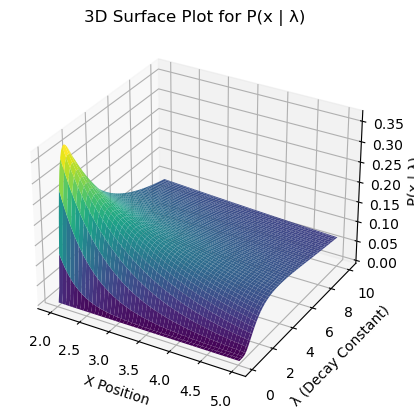

'--------------------Write your code above this line------------------------------'

In [16]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import os
'''--------------------Write your code below this line------------------------------'''
#adjust the particle class for 3D plotting
class Particle:
    
    def __init__(self, decay_constant=None):
        self.decay_constant = decay_constant
        
    def Z(self, lambda_val):
        return np.exp(-1/lambda_val)
    
    def pdf_decay(self, x, lambda_val):
        return (1/self.Z(lambda_val)) * (1/lambda_val) * np.exp(-x/lambda_val)

    def plot_3d_surface(self, x_range, lambda_range, file_path):
        X, LAMBDA = np.meshgrid(x_range, lambda_range)
        Z = np.array([self.pdf_decay(x, lambda_val) for x, lambda_val in zip(np.ravel(X), np.ravel(LAMBDA))])
        Z = Z.reshape(X.shape)

        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(X, LAMBDA, Z, cmap='viridis')

        ax.set_xlabel('X Position')
        ax.set_ylabel('Œª (Decay Constant)')
        ax.set_zlabel('P(x | Œª)')
        plt.title('3D Surface Plot for P(x | Œª)')

        plt.savefig(file_path)
        plt.show()

#testing
particle = Particle()
x_range = np.linspace(2, 5, 100)          
lambda_range = np.linspace(0.1, 10, 100)    
file_path = "output_path.png"              
particle.plot_3d_surface(x_range, lambda_range, file_path)

'''--------------------Write your code above this line------------------------------'''

In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt


'''--------------------Write your code below this line------------------------------'''




'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h3><strong> Unknown Particle Decay </strong></h3>
</div>
<br>
You are given two datasets that record the decay distances of approximately $10^4$ data points in both a vacuum and an optical cavity. In this question, you are asked to infer the values of the decay constants, $\lambda$, under both conditions. The measurement files are 'Vacuum_decay_dataset.json' and 'Cavity_decay_dataset.json.' Here are snapshots of the data. 




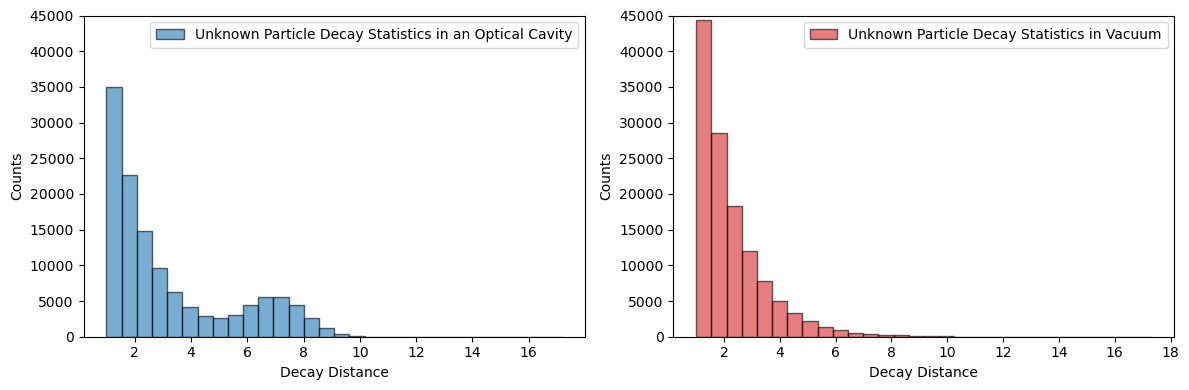

## E)
ou can observe that the optical cavity modifies a fraction of particles into a different type with distinct decay properties. What are the decay constants in both cases? How can you define the decay constant in the presence of an optical cavity? What additional structures have you observed? Let's assume the second particle type follows a Gaussian probability distribution function:
$$\mathcal{F}(x\ |\ \mu, \sigma)= \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}. $$
For simplicity, you can consider that the observed decay counts in an optical cavity are proportional to:
$\sim \mathcal{F}(x\ |\ \mu, \sigma) +P(x\ |\ \lambda) $. What are the parameters $\mu, \sigma, \lambda$ that best fit the data? Please provide your explanations and any relevant code.

Decay constant for vacuum (lambda_vacuum): -0.8000
Decay constant for optical cavity (lambda_cavity): -0.7112
Mean (mu) of the Gaussian distribution for particles: -6.9048
Standard deviation (sigma) of the Gaussian distribution for particles: 0.8590


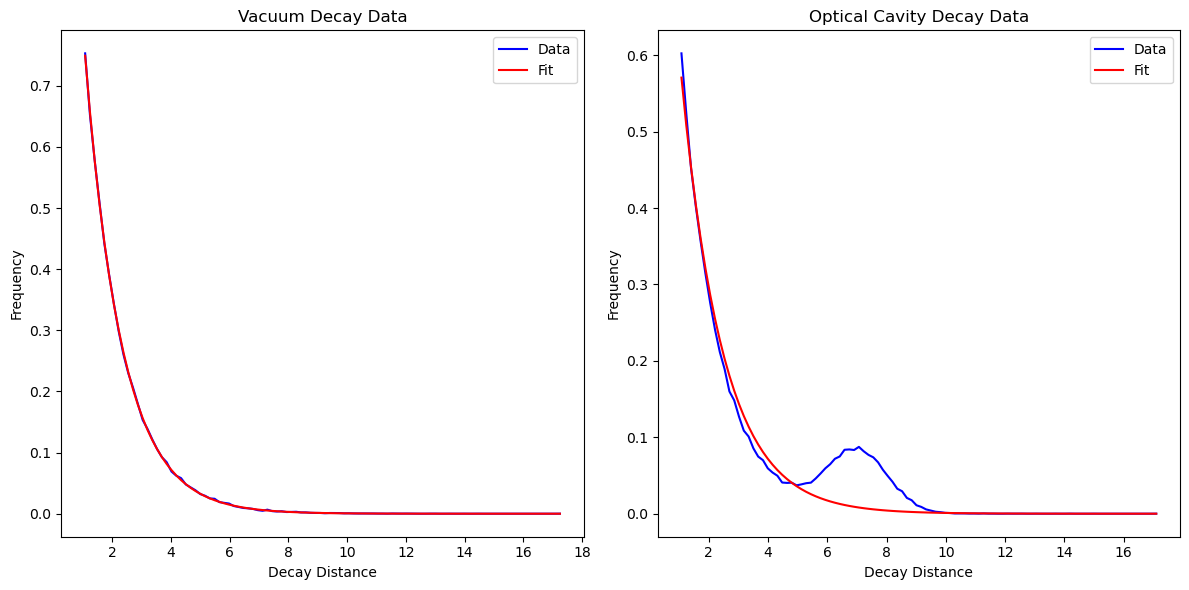

'--------------------Write your code above this line------------------------------'

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import json
from scipy.optimize import curve_fit
'''--------------------Write your code below this line------------------------------'''
with open('problem_2/Vacuum_decay_dataset.json', 'r') as file:
    vacuum_data = json.load(file)

with open('problem_2/Cavity_decay_dataset.json', 'r') as file:
    cavity_data = json.load(file)

def exponential_decay(x, a, b):
    return a * np.exp(b * x)

hist, bin_edges = np.histogram(vacuum_data, bins=100, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

params, covariance = curve_fit(exponential_decay, bin_centers, hist, p0=(1, -0.1))
a_vacuum, lambda_vacuum = params

def combined_decay(x, a, b, mu, sigma):
    decay = a * np.exp(b * x)
    gaussian = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(- (x - mu)**2 / (2 * sigma**2))
    return decay + gaussian

hist_cavity, bin_edges_cavity = np.histogram(cavity_data, bins=100, density=True)
bin_centers_cavity = (bin_edges_cavity[:-1] + bin_edges_cavity[1:]) / 2

p0_cavity = (a_vacuum, -abs(lambda_vacuum), 0, 1)
bounds = ([0, -np.inf, -np.inf, 0], [np.inf, 0, np.inf, np.inf])

params_cavity, covariance_cavity = curve_fit(combined_decay, bin_centers_cavity, hist_cavity, 
                                             p0=p0_cavity, 
                                             bounds=bounds)
a_cavity, lambda_cavity, mu, sigma = params_cavity

print(f"Decay constant for vacuum (lambda_vacuum): {lambda_vacuum:.4f}")
print(f"Decay constant for optical cavity (lambda_cavity): {lambda_cavity:.4f}")
print(f"Mean (mu) of the Gaussian distribution for particles: {mu:.4f}")
print(f"Standard deviation (sigma) of the Gaussian distribution for particles: {sigma:.4f}")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Vacuum Decay Data")
plt.plot(bin_centers, hist, 'b-', label="Data")
plt.plot(bin_centers, exponential_decay(bin_centers, a_vacuum, lambda_vacuum), 'r-', label="Fit")
plt.xlabel("Decay Distance")
plt.ylabel("Frequency")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Optical Cavity Decay Data")
plt.plot(bin_centers_cavity, hist_cavity, 'b-', label="Data")
plt.plot(bin_centers_cavity, combined_decay(bin_centers_cavity, a_cavity, lambda_cavity, mu, sigma), 'r-', label="Fit")
plt.xlabel("Decay Distance")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show()

'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h2><strong> Moment Generating Function (MGF)  </strong></h2>
</div>

The MGF of a random variable $x$ is denoted as $M(t)$, where $t$ is a real number. It is defined as:
$$M(t|\ \lambda) \sim \int dx e^{t x} P(x\ |\ \lambda). $$ It generates moments by differentiation:
$$\frac{\partial}{\partial t} M(t|\ \lambda)\big|_{t=0} \sim \int dx \big( x P(x\ |\ \lambda) \big) $$
The key idea is to take successive derivatives of the MGF with respect to the parameter $t$ and evaluate them at $t = 0$. Each derivative, when evaluated at $t = 0$, corresponds to a specific moment of the random variable. The process is systematic, and it allows you to calculate moments of different orders (mean, variance, skewness, kurtosis, etc.) in a structured way.



<div style="text-align: center;">
    <h3><strong> MGF of the decay process  </strong></h3>
</div>

Let's recal the probability density function in **Problem 2**,
$$P(x\ |\ \lambda) = \frac{1}{ Z(\lambda)} \frac{1}{\lambda}e^{-x/\lambda}\ \ \ \ \ \ 0 < x < \infty
$$
where
$$ Z(\lambda) = \int_0^\infty dx \frac{1}{\lambda}e^{-x/\lambda} = e^{-1/\lambda} . $$



## A) 
What is the MGF for the above probability density function? Calculate the above condition **analytically**,
<br> 
''**write you answer below**''
<br><br>  Substitute the probability density function into the definition of the MGF:

\begin{equation}
M(t| \lambda) = \int_0^\infty e^{tx} \frac{1}{Z(\lambda)} \frac{1}{\lambda}e^{-x/\lambda} dx
\end{equation}

 Plug in the normalization \( Z(ùúÜ) \) is \( e^(-1/ùúÜ) \). 

\begin{equation}
M(t| \lambda) = \int_0^\infty e^{tx} \frac{1}{e^{-1/\lambda}} \frac{1}{\lambda}e^{-x/\lambda} dx
\end{equation}

\begin{equation}
M(t| \lambda) = e^{1/\lambda} \int_0^\infty \frac{1}{\lambda} e^{(t - 1/\lambda) x} dx
\end{equation}

Integrate the expression with respect to \( x \):

\begin{equation}
M(t| \lambda) = e^{1/\lambda} \left[ \frac{e^{(t - 1/\lambda) x}}{t - 1/\lambda} \right]_0^\infty
\end{equation}

Evaluate the integral bounds:

For \( x = 0 \), \( e^((t - 1/ùúÜ) x) \) becomes 1. 

For \( x = ‚àû \), the exponential term will go to zero when \( t < 1/ùúÜ \). In order for the MGF to exist, we need\( t < 1/ùúÜ \).

therefore:

\begin{equation}
M(t| \lambda) = e^{1/\lambda} \left( \frac{1}{t - 1/\lambda} \right)
\end{equation}

for ( t < 1/ùúÜ ).



The MGF of the given probability density function is:

\begin{equation}
M(t| \lambda) = \frac{e^{1/\lambda}}{t - 1/\lambda}
\end{equation}


<br>
<br>
'' **write you answer above**''
<br> <br> 

## B) 
Using the above result, calculate the mean and variance **analytically**,
<br> 
''**write you answer below**''
<br><br> Determine Mean and Variance using MGF

the relationship between the moments and the MGF is:
\begin{equation}
\mu_n = \left. \frac{\partial^n}{\partial t^n} M(t| \lambda) \right|_{t=0}
\end{equation}

The first moment (mean). The first moment (\( n = 1 \)) corresponds to the mean, \( ùúá1\):
\begin{equation}
\mu_1 = \left. \frac{\partial}{\partial t} M(t| \lambda) \right|_{t=0}
\end{equation}
Differentiating the MGF \( M(t|ùúÜ) = e^(t/ùúÜ)/(t - 1/ùúÜ) \):
\begin{equation}
\frac{\partial}{\partial t} M(t| \lambda) = -\frac{e^{\frac{1}{\lambda}}}{(t - \frac{1}{\lambda})^2}
\end{equation}
at \( t=0 \):
\begin{equation}
\mu_1 = -\lambda^2 e^{\frac{1}{\lambda}}
\end{equation}

Find the second moment. The second moment (\( n = 2 \)) is:
\begin{equation}
\mu_2 = \left. \frac{\partial^2}{\partial t^2} M(t| \lambda) \right|_{t=0}
\end{equation}
Differentiating the previous derivative:
\begin{equation}
\frac{\partial^2}{\partial t^2} M(t| \lambda) = 2\frac{e^{\frac{1}{\lambda}}}{(t - \frac{1}{\lambda})^3}
\end{equation}
Evaluating at \( t=0 \):
\begin{equation}
\mu_2 = 2\lambda^3 e^{\frac{1}{\lambda}}
\end{equation}

Find the variance. The variance, \( ùúé^2 \), is:
\begin{equation}
\sigma^2 = \mu_2 - \mu_1^2
\end{equation}
Substitute 
\begin{equation}
\sigma^2 = 2\lambda^3 e^{\frac{1}{\lambda}} - \lambda^4 e^{\frac{2}{\lambda}}
\end{equation}


The mean is
\begin{equation}
\mu_1 = -\lambda^2 e^{\frac{1}{\lambda}}
\end{equation}
The variance is
\begin{equation}
\sigma^2 = 2\lambda^3 e^{\frac{1}{\lambda}} - \lambda^4 e^{\frac{2}{\lambda}}
\end{equation}
<br>
<br>
'' **write you answer above**''
<br> <br> 

## C) 
**Numerically** evaluate (finite differences) the first-order derivative and the second-order derivative that yield the mean and variance at various $\lambda$ values. Plot the analytical functions against the numerical results. 

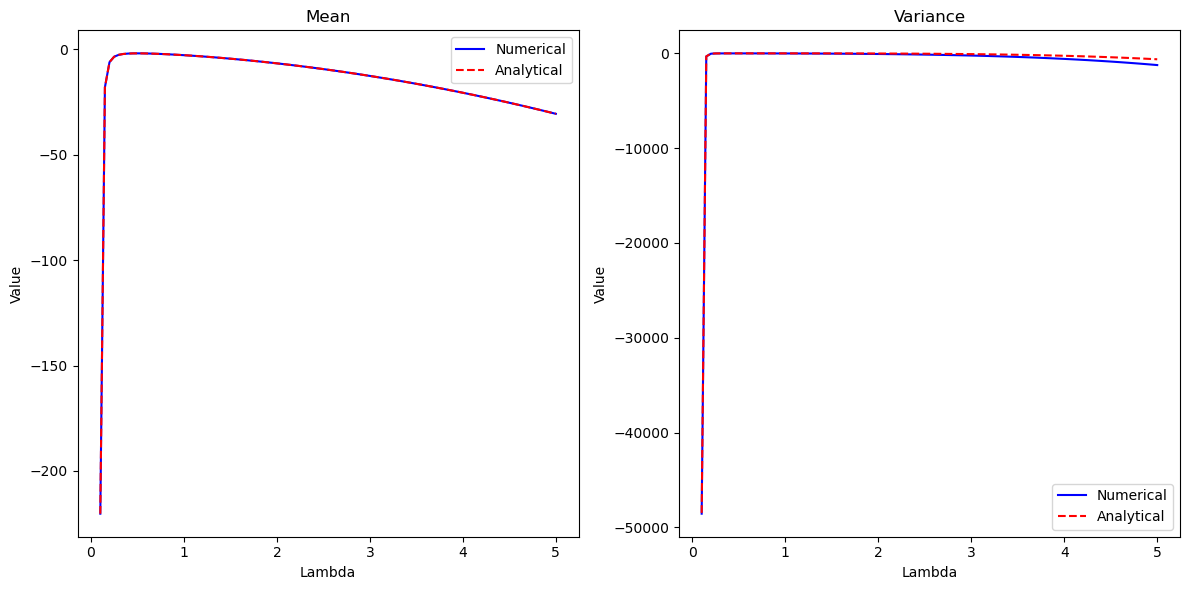

'--------------------Write your code above this line------------------------------'

In [4]:


'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt

def MGF(t, lambda_):
    return np.exp(1/lambda_) / (t - 1/lambda_)

def derivative(func, t, lambda_, order=1, h=1e-5):
    if order == 1:
        return (func(t+h, lambda_) - func(t-h, lambda_)) / (2*h)
    elif order == 2:
        return (func(t+h, lambda_) - 2*func(t, lambda_) + func(t-h, lambda_)) / (h**2)
    else:
        raise ValueError("Order not supported")


def analytical_mean(lambda_):
    return -lambda_**2 * np.exp(1/lambda_)

def analytical_variance(lambda_):
    return 2*lambda_**3 * np.exp(1/lambda_) - (lambda_**2 * np.exp(1/lambda_))**2


lambdas = np.linspace(0.1, 5, 100)


numerical_means = [derivative(MGF, 0, lambda_, order=1) for lambda_ in lambdas]
numerical_ex2 = [derivative(MGF, 0, lambda_, order=2) for lambda_ in lambdas]

numerical_variances = [ex2 - mean**2 for ex2, mean in zip(numerical_ex2, numerical_means)]

analytical_means = [analytical_mean(lambda_) for lambda_ in lambdas]
analytical_variances = [analytical_variance(lambda_) for lambda_ in lambdas]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(lambdas, numerical_means, 'b-', label='Numerical')
plt.plot(lambdas, analytical_means, 'r--', label='Analytical')
plt.title('Mean')
plt.xlabel('Lambda')
plt.ylabel('Value')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(lambdas, numerical_variances, 'b-', label='Numerical')
plt.plot(lambdas, analytical_variances, 'r--', label='Analytical')
plt.title('Variance')
plt.xlabel('Lambda')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()





'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h3><strong> MGF of a biased coin  </strong></h3>
</div>

Let's recal the likelihood function (probability mass function) in **Problem 1** ,
<br>
$$ P(M,N|p) = \binom{N}{M} p^{M} (1-p)^{N-M}. $$
<br>

## D) 
What is the MGF for the above probability mass function? Calculate the above condition **analytically**,
<br> 
''**write you answer below**''
<br><br> The Moment Generating Function (MGF) for the given probability mass function is derived from the definition of MGF and the binomial expansion.

likelihood function is:
$$P(M,N|p) = \binom{N}{M} p^{M} (1-p)^{N-M}$$

The MGF is :
$$M(t) = \sum_{M=0}^{N} e^{tM} \binom{N}{M} p^M (1-p)^{N-M}$$

Rearranging terms:
$$M(t) = \sum_{M=0}^{N} \binom{N}{M} (pe^t)^M (1-p)^{N-M}$$

This is similar to the binomial expansion of (a + b)^n, where:
$$a = 1-p$$
$$b = pe^t$$

Thus, the MGF becomes:
$$M(t) = ((1-p) + pe^t)^N$$ <br>
<br>
'' **write you answer above**''
<br> <br> 
Hint, you should consider the sum,  
$$M(t) = \sum_{x=0}^{n} e^{tx} \binom{n}{x} p^x (1-p)^{n-x}$$
and use the fact,
$$(a + b)^n = \sum_{k=0}^{n} \binom{n}{k} a^{n-k} b^k$$

## E) 
Using the above result, calculate the mean and variance **analytically**,
<br> 
''**write you answer below**''
<br><br>  Moment Generating Function (MGF) is:
$$M(t) = ((1-p) + pe^t)^N$$

To find the mean mu and variance sigma^2: 

1. The mean is differentiating the MGF with respect to t  and evaluating at t = 0:
$$\mu = M'(0)$$
after differentiation:
$$\mu = Np$$

2. The second moment is  differentiating the MGF a second time with respect to t and evaluating at t = 0 :
$$\mu_2 = M''(0)$$
$$\mu_2 = Np(1 + (N-1)p)$$

3. The variance is :
$$\sigma^2 = \mu_2 - \mu^2$$
Simplify:
$$\sigma^2 = Np(1-p)$$

 <br>
<br>
'' **write you answer above**''
<br> <br> 

## F) 
**Numerically** evaluate (finite differences) the first-order derivative and the second-order derivative that yield the mean and variance at various $\lambda$ values. Plot the analytical functions against the numerical results. 

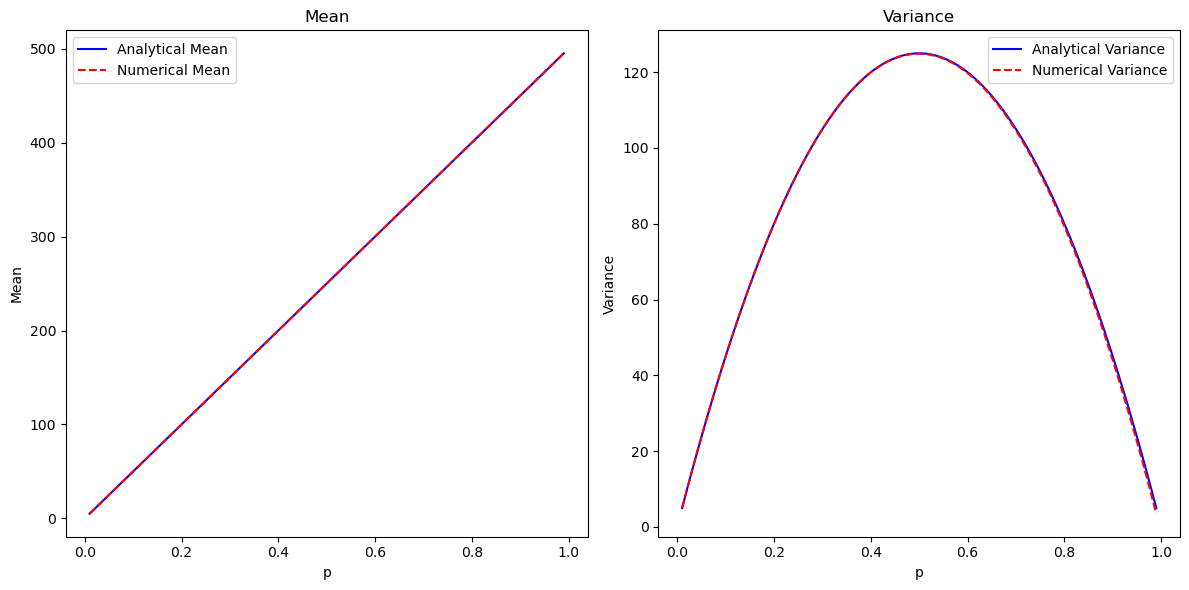

'--------------------Write your code above this line------------------------------'

In [1]:


'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt

N = 500
p_values = np.linspace(0.01, 0.99, 100)  

analytical_mean = N * p_values
analytical_variance = N * p_values * (1 - p_values)

def MGF(t, p, N):
    return ((1-p) + p*np.exp(t))**N

delta_t = 1e-5

numerical_first_derivative = (MGF(delta_t, p_values, N) - MGF(-delta_t, p_values, N)) / (2*delta_t)
numerical_second_derivative = (MGF(delta_t, p_values, N) + MGF(-delta_t, p_values, N) - 2*MGF(0, p_values, N)) / delta_t**2

numerical_mean = numerical_first_derivative
numerical_variance = numerical_second_derivative - numerical_mean**2

plt.figure(figsize=(12, 6))

# Mean
plt.subplot(1, 2, 1)
plt.plot(p_values, analytical_mean, label='Analytical Mean', color='blue')
plt.plot(p_values, numerical_mean, '--', label='Numerical Mean', color='red')
plt.title('Mean')
plt.xlabel('p')
plt.ylabel('Mean')
plt.legend()

# Variance
plt.subplot(1, 2, 2)
plt.plot(p_values, analytical_variance, label='Analytical Variance', color='blue')
plt.plot(p_values, numerical_variance, '--', label='Numerical Variance', color='red')
plt.title('Variance')
plt.xlabel('p')
plt.ylabel('Variance')
plt.legend()

plt.tight_layout()
plt.show()





'''--------------------Write your code above this line------------------------------'''